
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-24 20:33:47--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-24 20:33:47--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

In [ ]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased



## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
2. ¿Cuál es el porcentaje de `biased` sobre el total?


Index(['Contents', 'Label'], dtype='object')
Label
non-biased    1596
biased         318
Name: count, dtype: int64


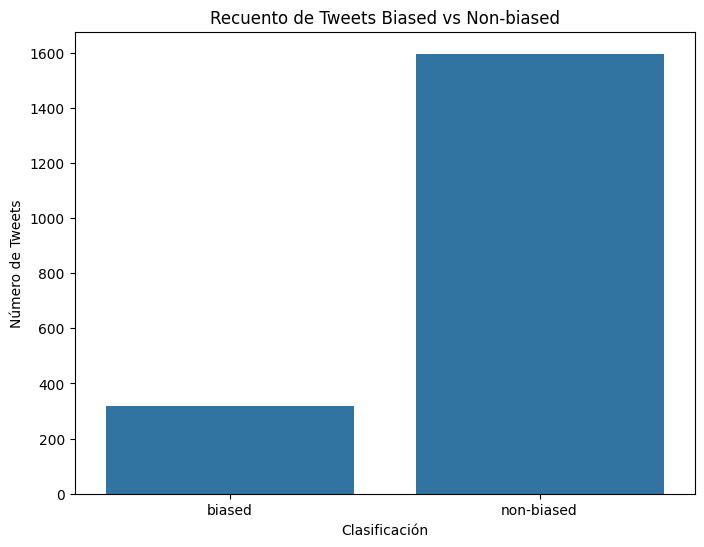

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo CSV
tweets = pd.read_csv('Gender_bias_spanish.csv')

# Check the actual column names in the DataFrame
print(tweets.columns)

# Assuming the column name is 'Label' based on the Global variables output,
# replace 'biased' with 'Label' in the following lines:
# Recuento de 'biased' vs 'non-biased'
recuento = tweets['Label'].value_counts()  # Changed 'biased' to 'Label'
print(recuento)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=tweets)  # Changed 'biased' to 'Label'
plt.title('Recuento de Tweets Biased vs Non-biased')
plt.xlabel('Clasificación')
plt.ylabel('Número de Tweets')
plt.show()

In [ ]:
porcentaje_biased = (recuento['biased'] / recuento.sum()) * 100
print(f"Porcentaje de 'biased': {porcentaje_biased:.2f}%") # Removed the extra space before print

Porcentaje de 'biased': 16.61%



## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  
2. ¿Cuántos tweets quedaron vacíos después de la limpieza?


In [ ]:
import re
import nltk
import unidecode
from nltk.corpus import stopwords

# Descarga las stopwords en español si no las tienes
nltk.download('stopwords')

def limpiar_texto(texto):
    # 1. Minúsculas
    texto = texto.lower()

    # 2. Quitar tildes
    texto = unidecode.unidecode(texto)

    # 3. Eliminar URLs, menciones y hashtags
    texto = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+", "", texto)

    # 4. Quitar caracteres no alfabéticos
    texto = re.sub(r"[^a-záéíóúüñ\s]", "", texto)

    # 5. Eliminar stopwords en español
    stop_words = stopwords.words('spanish')
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stop_words])

    # 6. Eliminar palabras con menos de 3 caracteres
    texto = " ".join([palabra for palabra in texto.split() if len(palabra) >= 3])

    return texto

# Print the available columns to identify the correct one
# print(tweets.columns) # This is no longer needed as we know the correct column name.

tweets['clean'] = tweets['Contents'].apply(limpiar_texto)  # Changed 'Tweet' to 'Contents'


# Calculate the average length of original tweets
original_length = tweets['Contents'].str.len().mean()

# Calculate the average length of cleaned tweets
cleaned_length = tweets['clean'].str.len().mean()

# Calculate the change in average length
change_in_length = original_length - cleaned_length

# Calculate the number of empty tweets after cleaning
empty_tweets_count = tweets['clean'].apply(lambda x: len(x) == 0).sum()

# Print the results
print(f"1. Cambio en la longitud media de los tweets: {change_in_length:.2f} caracteres")
print(f"2. Número de tweets vacíos después de la limpieza: {empty_tweets_count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Cambio en la longitud media de los tweets: 41.43 caracteres
2. Número de tweets vacíos después de la limpieza: 0



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  
2. ¿Qué diferencias de tono observas entre ambas nubes?


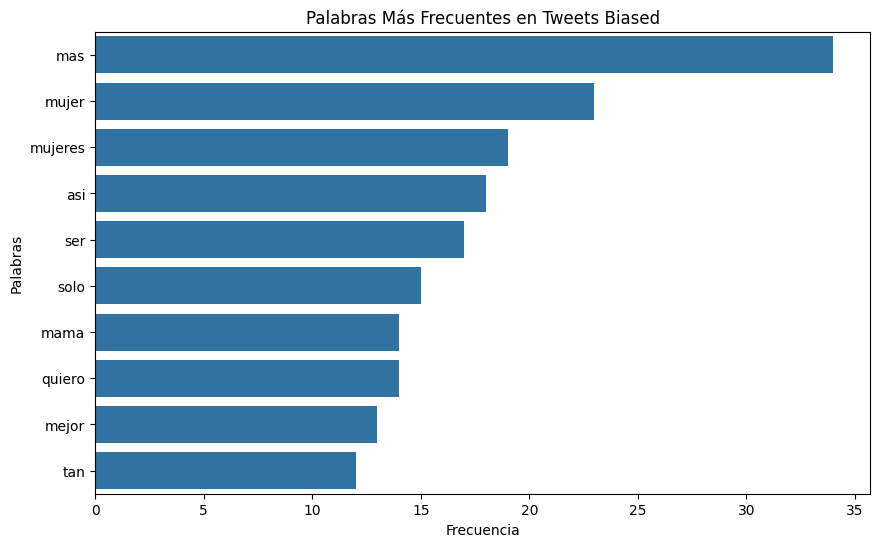

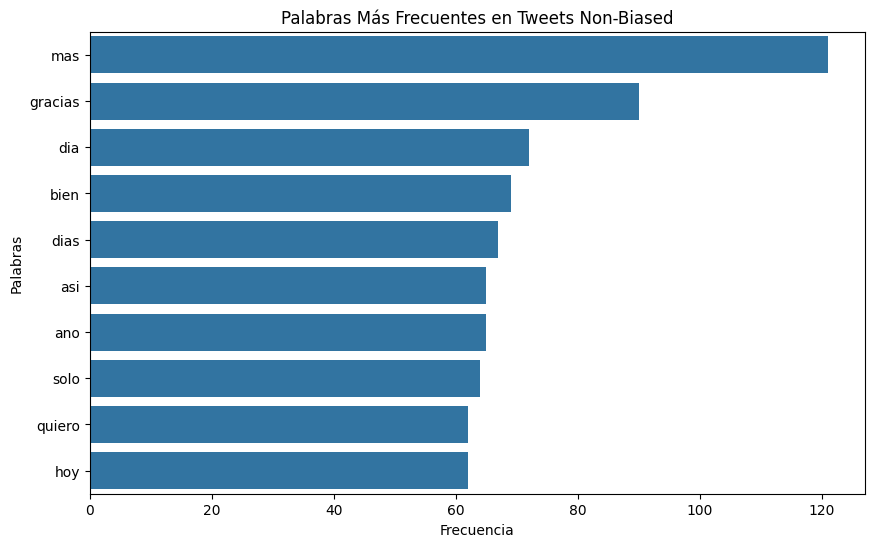

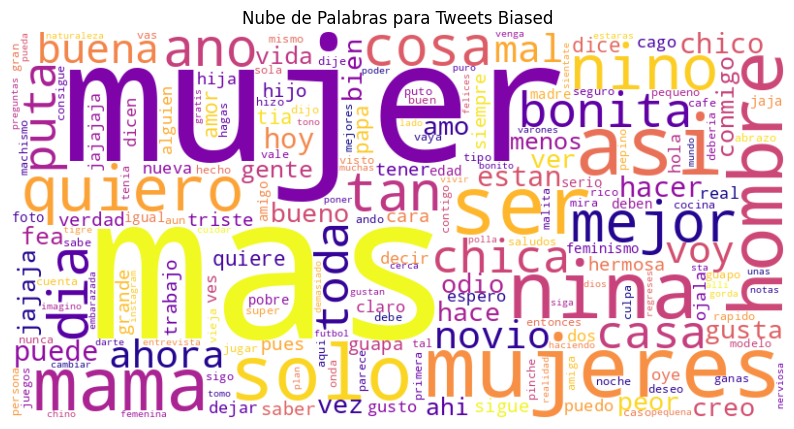

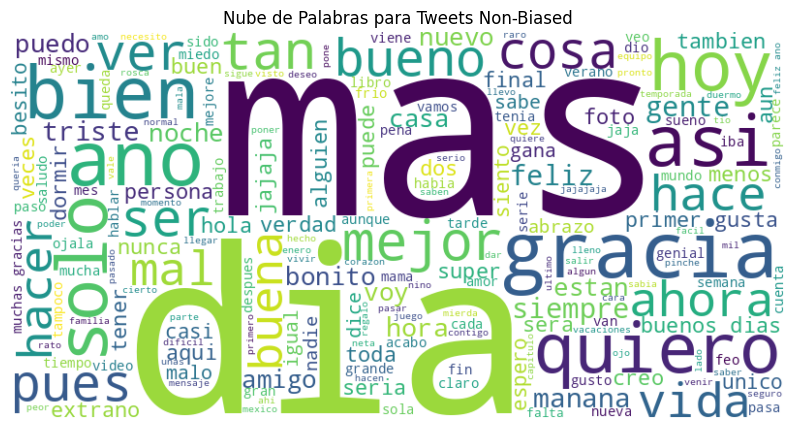

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Dividir los tweets en dos grupos: biased y non-biased
biased_tweets = tweets[tweets['Label'] == 'biased']['clean'].str.cat(sep=' ')
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['clean'].str.cat(sep=' ')

# Función para obtener las palabras más frecuentes
def obtener_palabras_frecuentes(texto, n=10):
    palabras = texto.lower().split()

    # Eliminar stopwords adicionales si es necesario
    #stop_words = set(stopwords.words('spanish'))
    #stop_words.update(["si", "solo", "puede", "hacer", "ahora", "va", "día"])
    #palabras = [palabra for palabra in palabras if palabra not in stop_words and len(palabra) > 2]

    frecuencia_palabras = Counter(palabras)
    palabras_frecuentes = frecuencia_palabras.most_common(n)
    return palabras_frecuentes

# Obtener las 10 palabras más frecuentes para cada clase
biased_frecuentes = obtener_palabras_frecuentes(biased_tweets)
non_biased_frecuentes = obtener_palabras_frecuentes(non_biased_tweets)

# Graficar las palabras más frecuentes
def graficar_palabras_frecuentes(palabras_frecuentes, titulo):
    palabras, frecuencias = zip(*palabras_frecuentes)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frecuencias), y=list(palabras))
    plt.title(titulo)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.show()

graficar_palabras_frecuentes(biased_frecuentes, 'Palabras Más Frecuentes en Tweets Biased')
graficar_palabras_frecuentes(non_biased_frecuentes, 'Palabras Más Frecuentes en Tweets Non-Biased')

# Generar nubes de palabras
def generar_nube_palabras(texto, titulo, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap, stopwords=STOPWORDS).generate(texto)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

generar_nube_palabras(biased_tweets, 'Nube de Palabras para Tweets Biased', 'plasma')
generar_nube_palabras(non_biased_tweets, 'Nube de Palabras para Tweets Non-Biased', 'viridis')

**R=**

1) Las palabras más usadas son: Mujer, más y día

2) La diferencia de odio entre la primera y segunda nube es que en la primera, se centra en el odio y la segunda en conceptos positivos.


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?


In [ ]:
!pip install textblob==0.17.1
from textblob import TextBlob
tweets['polarity'] = tweets['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.19.0
    Uninstalling textblob-0.19.0:
      Successfully uninstalled textblob-0.19.0


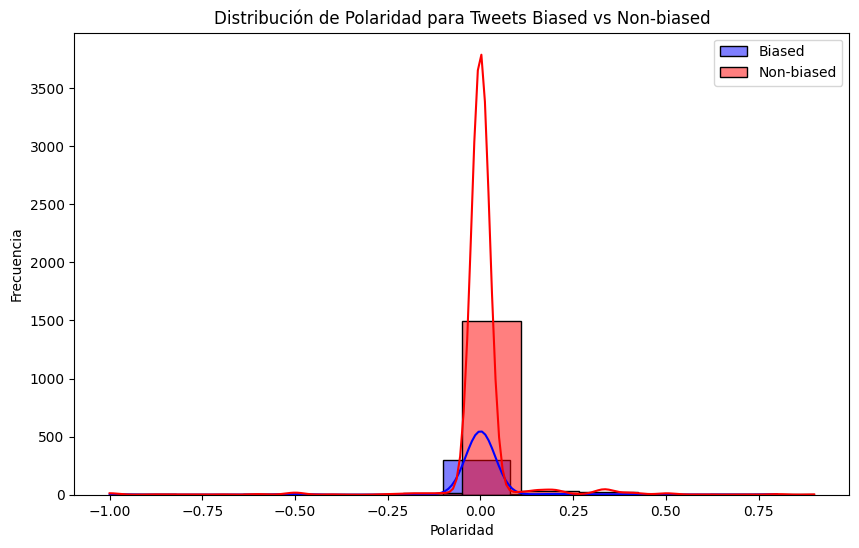

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(tweets[tweets['Label'] == 'biased']['polarity'], color='blue', label='Biased', kde=True)
sns.histplot(tweets[tweets['Label'] == 'non-biased']['polarity'], color='red', label='Non-biased', kde=True)
plt.title('Distribución de Polaridad para Tweets Biased vs Non-biased')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**R=**

1) No hay diferencias significativas en la distribución de sentimientos ya que en ambos casos (biased y non-biased) están los datos centrados.

2) Acorde a las gráficas analizados, los datos tienden a ser neutrales.


## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  
2. ¿Qué usuarios son los más mencionados y en qué contexto?


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tweets' is your DataFrame and 'Contents' is the column with the tweets
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

def extract_mentions(text):
    return re.findall(r"@(\w+)", text)

tweets['hashtags'] = tweets['Contents'].apply(extract_hashtags)
tweets['mentions'] = tweets['Contents'].apply(extract_mentions)

# Flatten the lists of hashtags and mentions
all_hashtags = [hashtag for sublist in tweets['hashtags'] for hashtag in sublist]
all_mentions = [mention for sublist in tweets['mentions'] for mention in sublist]

<ipython-input-37-684b0f3d3587>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette=colors)


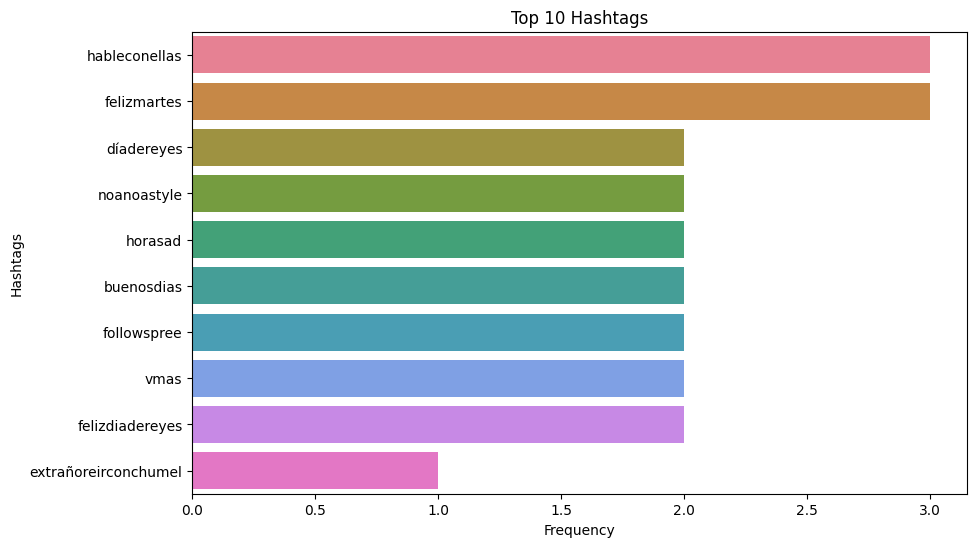

<ipython-input-37-684b0f3d3587>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette=colors)


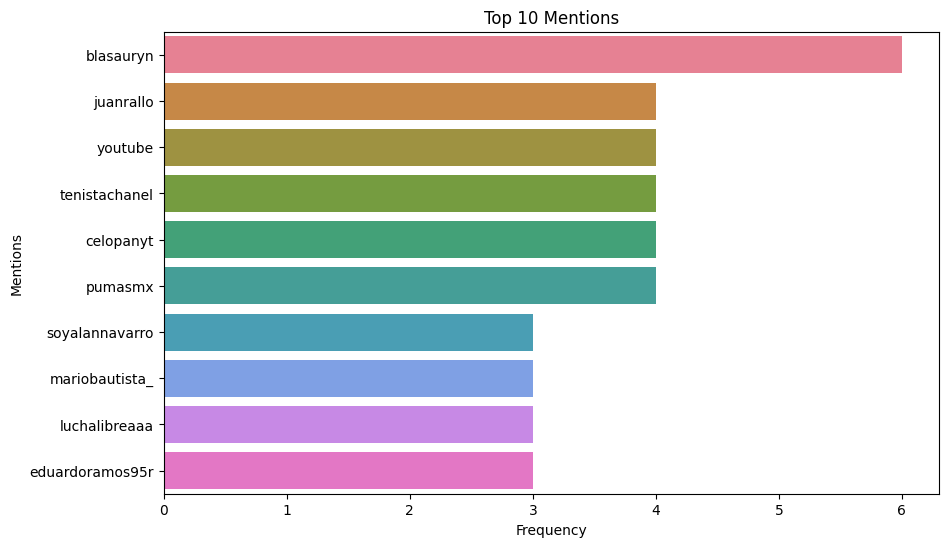

In [ ]:
from collections import Counter

# Get the 10 most frequent hashtags and mentions
top_hashtags = Counter(all_hashtags).most_common(10)
top_mentions = Counter(all_mentions).most_common(10)

# Create bar graphs
def plot_bar_graph(data, title, xlabel, ylabel):
    items, counts = zip(*data)
    plt.figure(figsize=(10, 6))

    # Create a color palette with the desired number of colors
    colors = sns.color_palette("husl", len(items))  # Example: "husl" palette

    # Create the bar plot with specified colors
    sns.barplot(x=list(counts), y=list(items), palette=colors)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_bar_graph(top_hashtags, 'Top 10 Hashtags', 'Frequency', 'Hashtags')
plot_bar_graph(top_mentions, 'Top 10 Mentions', 'Frequency', 'Mentions')

In [ ]:
tweets_con_menciones = tweets[tweets['Contents'].str.contains("@blasauryn")]


In [ ]:
# Filtrar tweets que mencionan a "blasauryn"
tweets_con_menciones = tweets[tweets['Contents'].str.contains("@blasauryn")]

# Imprimir los tweets
for tweet in tweets_con_menciones['Contents']:
  print(tweet)

¿algún día seré feliz por tener tu follow? @blasauryn 
estás haciendo muy feliz a todo mi tl,yo también quiero que me sigas  @blasauryn
ya a saber cuando vuelves a hacer un #followexpress  lloro @blasauryn
baby @blasauryn #followspree. y la suerte de la semana pasada???  esto sería demasiado grande para mi.
@blasauryn si es que no puedo olvidar cuando te viii, imposible. que resumiendo, no te puedo olvidar  y no lo haré jamás chiqui
nunca he tenido esta sensacion, ¿me la harías sentir? es muy importante para mí blas @blasauryn  #followspree


**R=**

1) Hable con ellas es el hashtag más utilizado en la base de datos biased

2)blasauryn es el tipo de usuarios más mencionados y se mencionan en contestos amorosos.



## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.  
* Un insight sobre el **sentimiento**.  
* Una recomendación de comunicación para la marca.
